# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## Libreries:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## * [API CoinGecko](https://www.coingecko.com/es/api/documentation):

### Listado de monedas:

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10059                  zynecoin    zyn                   Zynecoin
10060                   zynergy    zyn                    Zynergy
10061                     zyrri    zyr                      Zyrri
10062                       zyx    zyx                        ZYX
10063                       zzz    zzz                GoSleep ZZZ

[10064 rows x 3 columns]


In [3]:
coin_id = coin_id.drop_duplicates()

In [4]:
coin_id.isnull().sum()

id        0
symbol    0
name      0
dtype: int64

In [5]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10064 non-null  object
 1   symbol  10064 non-null  object
 2   name    10064 non-null  object
dtypes: object(3)
memory usage: 236.0+ KB


### Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

In [6]:
#for one coine only, historical prices.
crip_id = 'bitcoin'
day_interval = 163
def get_coin_list():
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_prices = get_coin_list()
    if list_of_prices is not None:
        print(list_of_prices)

                           prices                          market_caps  \
0    [1678147200000, 22415.11366]   [1678147200000, 432758824798.3097]   
1    [1678233600000, 22217.20988]  [1678233600000, 427994888566.54205]   
2    [1678320000000, 21712.65119]   [1678320000000, 419694984165.3824]   
3    [1678406400000, 20376.32001]   [1678406400000, 392841773384.4403]   
4    [1678492800000, 20195.22895]  [1678492800000, 390202255053.33545]   
..                            ...                                  ...   
159  [1691884800000, 29412.14227]   [1691884800000, 572257798803.9086]   
160  [1691971200000, 29284.96971]   [1691971200000, 569687130446.7833]   
161   [1692057600000, 29400.5868]   [1692057600000, 572242735188.2397]   
162   [1692144000000, 29170.4904]   [1692144000000, 567498309102.7323]   
163  [1692218536000, 28921.74738]   [1692218536000, 563425051229.7137]   

                           total_volumes  
0    [1678147200000, 21124920006.057713]  
1    [1678233600000, 2778

In [7]:
list_of_prices.head()

,prices,market_caps,total_volumes
0,"[1678147200000, 22415.11366]","[1678147200000, 432758824798.3097]","[1678147200000, 21124920006.057713]"
1,"[1678233600000, 22217.20988]","[1678233600000, 427994888566.54205]","[1678233600000, 27780357943.162678]"
2,"[1678320000000, 21712.65119]","[1678320000000, 419694984165.3824]","[1678320000000, 28493032424.783108]"
3,"[1678406400000, 20376.32001]","[1678406400000, 392841773384.4403]","[1678406400000, 40173833477.660774]"
4,"[1678492800000, 20195.22895]","[1678492800000, 390202255053.33545]","[1678492800000, 51593890225.48742]"


### Extraer de las listas los valores necesarios

In [8]:
prices_list_ko = pd.DataFrame()
print(type(list_of_prices['prices'][1]))
print(list_of_prices['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_prices['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_prices['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_prices['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_prices['total_volumes'].apply(lambda lista: lista[1])

<class 'list'>
[1678147200000, 22415.11366]


In [9]:
prices.head()

,timestamp,price,market_cap,total_volume
0,1678147200000,22415.11366,4.327588e+11,2.112492e+10
1,1678233600000,22217.20988,4.279949e+11,2.778036e+10
2,1678320000000,21712.65119,4.196950e+11,2.849303e+10
3,1678406400000,20376.32001,3.928418e+11,4.017383e+10
4,1678492800000,20195.22895,3.902023e+11,5.159389e+10


In [10]:
prices['crip_id'] = crip_id

In [11]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     164 non-null    int64  
 1   price         164 non-null    float64
 2   market_cap    164 non-null    float64
 3   total_volume  164 non-null    float64
 4   crip_id       164 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.5+ KB


In [12]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

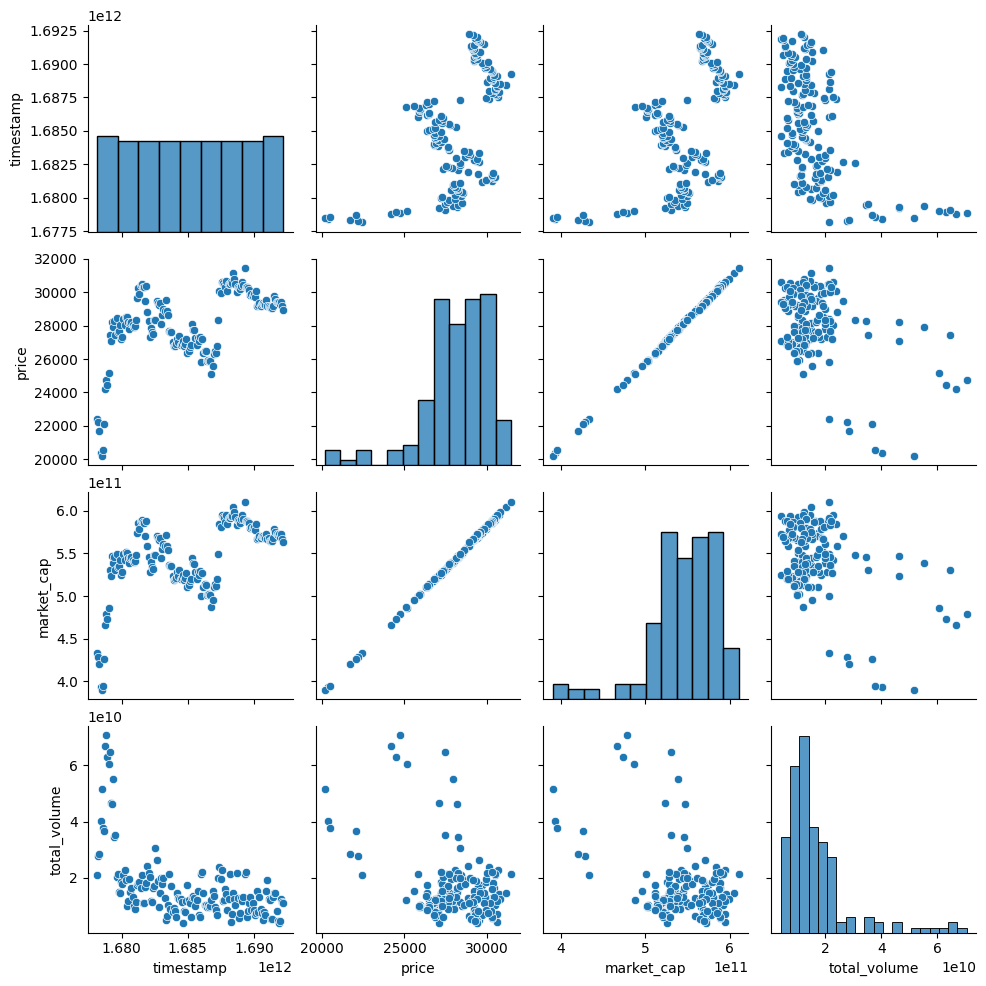

In [13]:
sns.pairplot(prices)

In [14]:
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [15]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,bitcoin,1678147200000,22415.11366,4.327588e+11,2.112492e+10
1,bitcoin,1678233600000,22217.20988,4.279949e+11,2.778036e+10
2,bitcoin,1678320000000,21712.65119,4.196950e+11,2.849303e+10
3,bitcoin,1678406400000,20376.32001,3.928418e+11,4.017383e+10
4,bitcoin,1678492800000,20195.22895,3.902023e+11,5.159389e+10


### OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [16]:
def get_coin_list():
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        list_of_ohlc = response.json()
        list_of_ohlc = pd.DataFrame(list_of_ohlc)
        return list_of_ohlc
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_ohlc = get_coin_list()
    if list_of_ohlc is not None:
        print(list_of_ohlc)

                 0            1            2            3            4
0    1689638400000  29927.33428  30233.97698  29927.33428  30123.01099
1    1689652800000  30151.72819  30215.23072  30126.62096  30126.62096
2    1689667200000  30103.71811  30109.41706  29976.40770  29976.40770
3    1689681600000  30016.97215  30030.45384  29992.13846  30030.45384
4    1689696000000  30007.39221  30007.39221  29812.25144  29922.03864
..             ...          ...          ...          ...          ...
176  1692172800000  29204.49296  29204.49296  29116.45163  29137.52218
177  1692187200000  29162.91461  29162.91461  29121.65214  29162.80705
178  1692201600000  29117.81596  29136.20921  29087.32951  29107.14051
179  1692216000000  29118.23680  29141.53014  29018.64596  29141.53014
180  1692230400000  29114.67565  29114.67565  29114.67565  29114.67565

[181 rows x 5 columns]


In [17]:
list_of_ohlc = list_of_ohlc.drop_duplicates()

In [18]:
list_of_ohlc.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [19]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       181 non-null    int64  
 1   1       181 non-null    float64
 2   2       181 non-null    float64
 3   3       181 non-null    float64
 4   4       181 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.2 KB
None


In [20]:
list_of_ohlc.head()

,0,1,2,3,4
0,1689638400000,29927.33428,30233.97698,29927.33428,30123.01099
1,1689652800000,30151.72819,30215.23072,30126.62096,30126.62096
2,1689667200000,30103.71811,30109.41706,29976.40770,29976.40770
3,1689681600000,30016.97215,30030.45384,29992.13846,30030.45384
4,1689696000000,30007.39221,30007.39221,29812.25144,29922.03864


In [21]:
# Renombrar las columnas existentes utilizando el método rename
list_of_ohlc.rename(columns={0: 'timestamp', 1: 'open_price', 2: 'high_price', 3: 'low_price', 4: 'close_price'}, inplace=True)

# Imprimir el DataFrame resultante
print(list_of_ohlc)

         timestamp   open_price   high_price    low_price  close_price
0    1689638400000  29927.33428  30233.97698  29927.33428  30123.01099
1    1689652800000  30151.72819  30215.23072  30126.62096  30126.62096
2    1689667200000  30103.71811  30109.41706  29976.40770  29976.40770
3    1689681600000  30016.97215  30030.45384  29992.13846  30030.45384
4    1689696000000  30007.39221  30007.39221  29812.25144  29922.03864
..             ...          ...          ...          ...          ...
176  1692172800000  29204.49296  29204.49296  29116.45163  29137.52218
177  1692187200000  29162.91461  29162.91461  29121.65214  29162.80705
178  1692201600000  29117.81596  29136.20921  29087.32951  29107.14051
179  1692216000000  29118.23680  29141.53014  29018.64596  29141.53014
180  1692230400000  29114.67565  29114.67565  29114.67565  29114.67565

[181 rows x 5 columns]


In [22]:
list_of_ohlc['crip_id'] = crip_id

In [23]:
list_of_ohlc = list_of_ohlc[['crip_id','timestamp','open_price','high_price','low_price','close_price']]

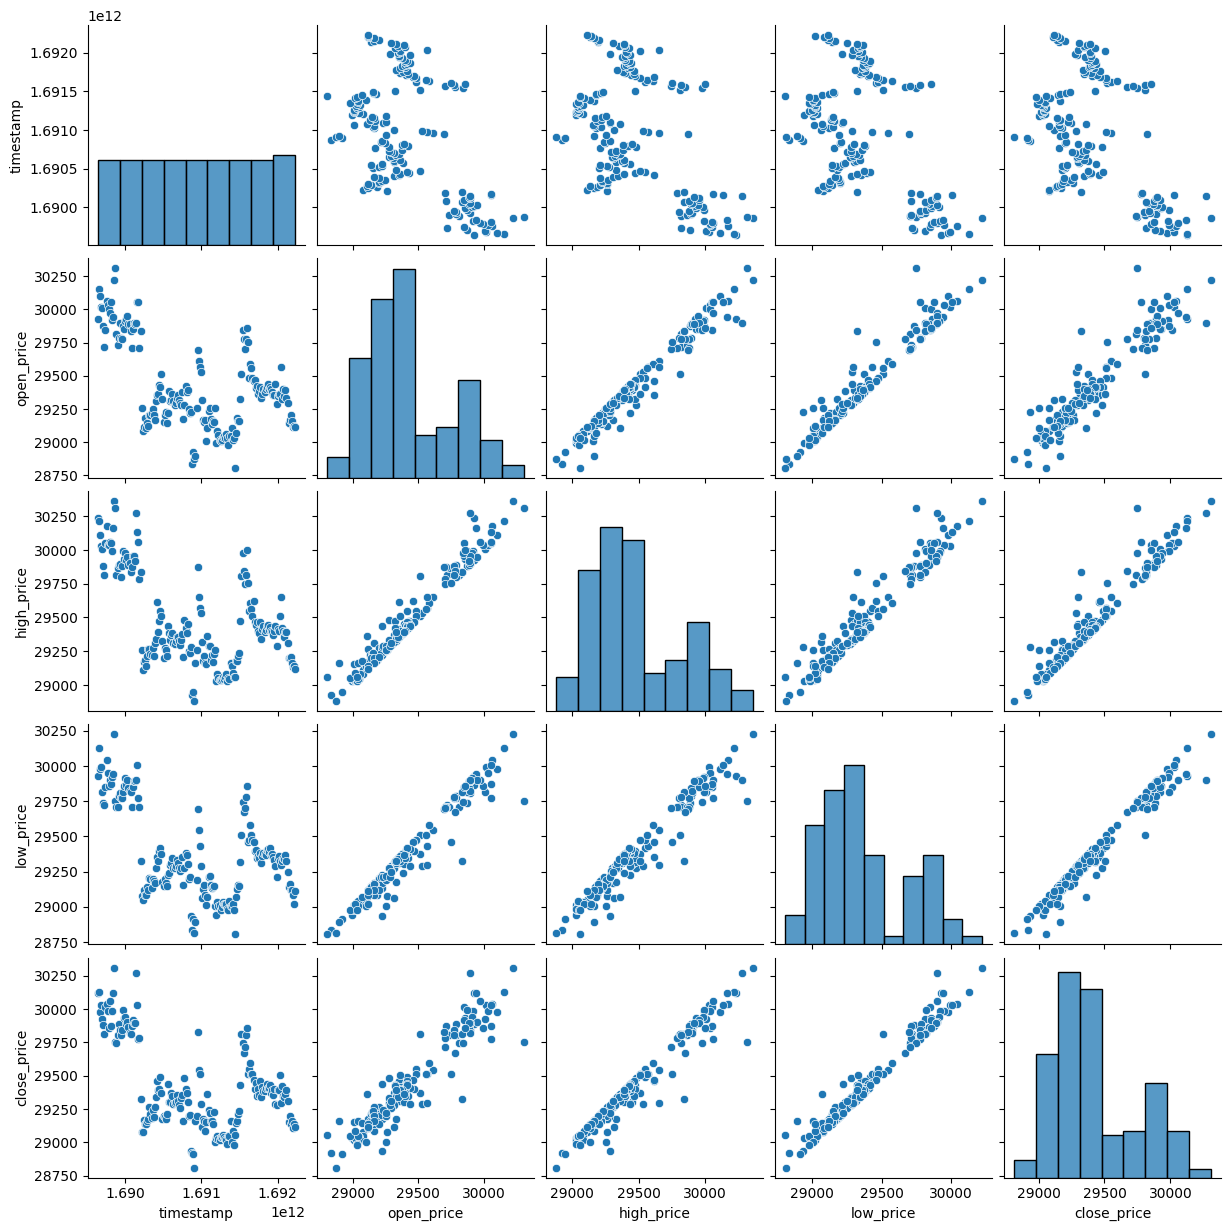

In [24]:
sns.pairplot(list_of_ohlc)

In [25]:
list_of_ohlc.head()

,crip_id,timestamp,open_price,high_price,low_price,close_price
0,bitcoin,1689638400000,29927.33428,30233.97698,29927.33428,30123.01099
1,bitcoin,1689652800000,30151.72819,30215.23072,30126.62096,30126.62096
2,bitcoin,1689667200000,30103.71811,30109.41706,29976.40770,29976.40770
3,bitcoin,1689681600000,30016.97215,30030.45384,29992.13846,30030.45384
4,bitcoin,1689696000000,30007.39221,30007.39221,29812.25144,29922.03864


### tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

In [26]:
def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print("Error en la solicitud de tickers:", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = "bitcoin"  # Cambia esto al ID de la moneda que te interesa
    
    ticker_data = get_coin_tickers(coin_id)
    
    if ticker_data is not None:
        # Obtener la lista de tickers
        tickers = ticker_data['tickers']
        
        # Crear un DataFrame a partir de los tickers
        ticker_df = pd.DataFrame(tickers)


In [27]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [28]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",28918.12,8031.114469,"{'btc': 0.99975125, 'eth': 16.018087, 'usd': 28918}","{'btc': 8029, 'eth': 128643, 'usd': 232244732}",green,0.015636,2023-08-16T20:53:02+00:00,2023-08-16T20:53:02+00:00,2023-08-16T20:53:02+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN
1,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",28913.90,1445.802666,"{'btc': 0.99960535, 'eth': 16.01575, 'usd': 28914}","{'btc': 1445, 'eth': 23156, 'usd': 41803794}",green,0.010346,2023-08-16T20:52:01+00:00,2023-08-16T20:52:01+00:00,2023-08-16T20:53:01+00:00,False,False,https://pro.kraken.com/app/trade/BTC-USD,None,bitcoin,NaN
2,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",28950.01,8889.181360,"{'btc': 0.99972926, 'eth': 16.016792, 'usd': 28914}","{'btc': 8943, 'eth': 143273, 'usd': 258638446}",green,0.010035,2023-08-16T20:51:21+00:00,2023-08-16T20:51:21+00:00,2023-08-16T20:51:21+00:00,False,False,https://www.xt.com/en/trade/btc_usdt,None,bitcoin,tether
3,BTC,USDT,"{'name': 'Tidex', 'identifier': 'tidex', 'has_trading_incentive': False}",28945.20,2888.613212,"{'btc': 0.99956316, 'eth': 16.014131, 'usd': 28909}","{'btc': 2887, 'eth': 46259, 'usd': 83506788}",green,0.058631,2023-08-16T20:51:47+00:00,2023-08-16T20:51:47+00:00,2023-08-16T20:51:47+00:00,False,False,None,None,bitcoin,tether
4,BTC,USDC,"{'name': 'ApeX Pro', 'identifier': 'apex_pro', 'has_trading_incentive': False}",28939.00,2061.983000,"{'btc': 1.000123, 'eth': 16.023771, 'usd': 28927}","{'btc': 2075, 'eth': 33244, 'usd': 60014513}",green,0.013456,2023-08-16T20:52:49+00:00,2023-08-16T20:52:49+00:00,2023-08-16T20:52:49+00:00,False,False,https://pro.apex.exchange/trade/BTC-USDC,None,bitcoin,usd-coin


In [29]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = ticker_df[ticker_df.isnull().any(axis=1)]
rows_with_nulls.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",28918.12,8031.114469,"{'btc': 0.99975125, 'eth': 16.018087, 'usd': 28918}","{'btc': 8029, 'eth': 128643, 'usd': 232244732}",green,0.015636,2023-08-16T20:53:02+00:00,2023-08-16T20:53:02+00:00,2023-08-16T20:53:02+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN
1,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",28913.90,1445.802666,"{'btc': 0.99960535, 'eth': 16.01575, 'usd': 28914}","{'btc': 1445, 'eth': 23156, 'usd': 41803794}",green,0.010346,2023-08-16T20:52:01+00:00,2023-08-16T20:52:01+00:00,2023-08-16T20:53:01+00:00,False,False,https://pro.kraken.com/app/trade/BTC-USD,None,bitcoin,NaN
2,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",28950.01,8889.181360,"{'btc': 0.99972926, 'eth': 16.016792, 'usd': 28914}","{'btc': 8943, 'eth': 143273, 'usd': 258638446}",green,0.010035,2023-08-16T20:51:21+00:00,2023-08-16T20:51:21+00:00,2023-08-16T20:51:21+00:00,False,False,https://www.xt.com/en/trade/btc_usdt,None,bitcoin,tether
3,BTC,USDT,"{'name': 'Tidex', 'identifier': 'tidex', 'has_trading_incentive': False}",28945.20,2888.613212,"{'btc': 0.99956316, 'eth': 16.014131, 'usd': 28909}","{'btc': 2887, 'eth': 46259, 'usd': 83506788}",green,0.058631,2023-08-16T20:51:47+00:00,2023-08-16T20:51:47+00:00,2023-08-16T20:51:47+00:00,False,False,None,None,bitcoin,tether
4,BTC,USDC,"{'name': 'ApeX Pro', 'identifier': 'apex_pro', 'has_trading_incentive': False}",28939.00,2061.983000,"{'btc': 1.000123, 'eth': 16.023771, 'usd': 28927}","{'btc': 2075, 'eth': 33244, 'usd': 60014513}",green,0.013456,2023-08-16T20:52:49+00:00,2023-08-16T20:52:49+00:00,2023-08-16T20:52:49+00:00,False,False,https://pro.apex.exchange/trade/BTC-USDC,None,bitcoin,usd-coin


In [30]:
ticker_df['token_info_url'] = ticker_df['token_info_url'].fillna('not founded token_info_url #404')
ticker_df['trade_url'] = ticker_df['trade_url'].fillna('not founded trade_url #404')

In [31]:
ticker_df['target_coin_id'] = ticker_df['target_coin_id'].fillna('USD')

In [32]:
ticker_df.isnull().sum()

base                         0
target                       0
market                       0
last                         0
volume                       0
converted_last               0
converted_volume             0
trust_score                  0
bid_ask_spread_percentage    0
timestamp                    0
last_traded_at               0
last_fetch_at                0
is_anomaly                   0
is_stale                     0
trade_url                    0
token_info_url               0
coin_id                      0
target_coin_id               0
dtype: int64

#### Timestamp

In [33]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
ticker_df['timestamp'] = ticker_df['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
ticker_df['last_traded_at'] = ticker_df['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
ticker_df['last_fetch_at'] = ticker_df['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [34]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",28918.12,8031.114469,"{'btc': 0.99975125, 'eth': 16.018087, 'usd': 28918}","{'btc': 8029, 'eth': 128643, 'usd': 232244732}",green,0.015636,1692219182000,1692219182000,1692219182000,False,False,https://pro.coinbase.com/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD
1,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",28913.90,1445.802666,"{'btc': 0.99960535, 'eth': 16.01575, 'usd': 28914}","{'btc': 1445, 'eth': 23156, 'usd': 41803794}",green,0.010346,1692219121000,1692219121000,1692219181000,False,False,https://pro.kraken.com/app/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD
2,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",28950.01,8889.181360,"{'btc': 0.99972926, 'eth': 16.016792, 'usd': 28914}","{'btc': 8943, 'eth': 143273, 'usd': 258638446}",green,0.010035,1692219081000,1692219081000,1692219081000,False,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether
3,BTC,USDT,"{'name': 'Tidex', 'identifier': 'tidex', 'has_trading_incentive': False}",28945.20,2888.613212,"{'btc': 0.99956316, 'eth': 16.014131, 'usd': 28909}","{'btc': 2887, 'eth': 46259, 'usd': 83506788}",green,0.058631,1692219107000,1692219107000,1692219107000,False,False,not founded trade_url #404,not founded token_info_url #404,bitcoin,tether
4,BTC,USDC,"{'name': 'ApeX Pro', 'identifier': 'apex_pro', 'has_trading_incentive': False}",28939.00,2061.983000,"{'btc': 1.000123, 'eth': 16.023771, 'usd': 28927}","{'btc': 2075, 'eth': 33244, 'usd': 60014513}",green,0.013456,1692219169000,1692219169000,1692219169000,False,False,https://pro.apex.exchange/trade/BTC-USDC,not founded token_info_url #404,bitcoin,usd-coin


#### market

In [35]:
ticker_df['marketplace'] = ticker_df['market'].apply(lambda x: x['name'])
ticker_df['marketplace_id'] = ticker_df['market'].apply(lambda x: x['identifier'])

In [36]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",28918.12,8031.114469,"{'btc': 0.99975125, 'eth': 16.018087, 'usd': 28918}","{'btc': 8029, 'eth': 128643, 'usd': 232244732}",green,0.015636,1692219182000,1692219182000,1692219182000,False,False,https://pro.coinbase.com/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Coinbase Exchange,gdax
1,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",28913.90,1445.802666,"{'btc': 0.99960535, 'eth': 16.01575, 'usd': 28914}","{'btc': 1445, 'eth': 23156, 'usd': 41803794}",green,0.010346,1692219121000,1692219121000,1692219181000,False,False,https://pro.kraken.com/app/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Kraken,kraken
2,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",28950.01,8889.181360,"{'btc': 0.99972926, 'eth': 16.016792, 'usd': 28914}","{'btc': 8943, 'eth': 143273, 'usd': 258638446}",green,0.010035,1692219081000,1692219081000,1692219081000,False,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether,XT.COM,xt
3,BTC,USDT,"{'name': 'Tidex', 'identifier': 'tidex', 'has_trading_incentive': False}",28945.20,2888.613212,"{'btc': 0.99956316, 'eth': 16.014131, 'usd': 28909}","{'btc': 2887, 'eth': 46259, 'usd': 83506788}",green,0.058631,1692219107000,1692219107000,1692219107000,False,False,not founded trade_url #404,not founded token_info_url #404,bitcoin,tether,Tidex,tidex
4,BTC,USDC,"{'name': 'ApeX Pro', 'identifier': 'apex_pro', 'has_trading_incentive': False}",28939.00,2061.983000,"{'btc': 1.000123, 'eth': 16.023771, 'usd': 28927}","{'btc': 2075, 'eth': 33244, 'usd': 60014513}",green,0.013456,1692219169000,1692219169000,1692219169000,False,False,https://pro.apex.exchange/trade/BTC-USDC,not founded token_info_url #404,bitcoin,usd-coin,ApeX Pro,apex_pro


#### converted_last


In [37]:
ticker_df['converted_last_btc'] = ticker_df['converted_last'].apply(lambda x: x['btc'])
ticker_df['converted_last_eth'] = ticker_df['converted_last'].apply(lambda x: x['eth'])
ticker_df['converted_last_usd'] = ticker_df['converted_last'].apply(lambda x: x['usd'])

In [38]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       100 non-null    object 
 1   target                     100 non-null    object 
 2   market                     100 non-null    object 
 3   last                       100 non-null    float64
 4   volume                     100 non-null    float64
 5   converted_last             100 non-null    object 
 6   converted_volume           100 non-null    object 
 7   trust_score                100 non-null    object 
 8   bid_ask_spread_percentage  100 non-null    float64
 9   timestamp                  100 non-null    int64  
 10  last_traded_at             100 non-null    int64  
 11  last_fetch_at              100 non-null    int64  
 12  is_anomaly                 100 non-null    bool   
 13  is_stale                   100 non-null    bool   


In [39]:
ticker_df.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,BTC,USD,"{'name': 'Coinbase Exchange', 'identifier': 'gdax', 'has_trading_incentive': False}",28918.12,8031.114469,"{'btc': 0.99975125, 'eth': 16.018087, 'usd': 28918}","{'btc': 8029, 'eth': 128643, 'usd': 232244732}",green,0.015636,1692219182000,...,False,https://pro.coinbase.com/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Coinbase Exchange,gdax,0.999751,16.018087,28918
1,BTC,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",28913.90,1445.802666,"{'btc': 0.99960535, 'eth': 16.01575, 'usd': 28914}","{'btc': 1445, 'eth': 23156, 'usd': 41803794}",green,0.010346,1692219121000,...,False,https://pro.kraken.com/app/trade/BTC-USD,not founded token_info_url #404,bitcoin,USD,Kraken,kraken,0.999605,16.015750,28914
2,BTC,USDT,"{'name': 'XT.COM', 'identifier': 'xt', 'has_trading_incentive': False}",28950.01,8889.181360,"{'btc': 0.99972926, 'eth': 16.016792, 'usd': 28914}","{'btc': 8943, 'eth': 143273, 'usd': 258638446}",green,0.010035,1692219081000,...,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether,XT.COM,xt,0.999729,16.016792,28914
3,BTC,USDT,"{'name': 'Tidex', 'identifier': 'tidex', 'has_trading_incentive': False}",28945.20,2888.613212,"{'btc': 0.99956316, 'eth': 16.014131, 'usd': 28909}","{'btc': 2887, 'eth': 46259, 'usd': 83506788}",green,0.058631,1692219107000,...,False,not founded trade_url #404,not founded token_info_url #404,bitcoin,tether,Tidex,tidex,0.999563,16.014131,28909
4,BTC,USDC,"{'name': 'ApeX Pro', 'identifier': 'apex_pro', 'has_trading_incentive': False}",28939.00,2061.983000,"{'btc': 1.000123, 'eth': 16.023771, 'usd': 28927}","{'btc': 2075, 'eth': 33244, 'usd': 60014513}",green,0.013456,1692219169000,...,False,https://pro.apex.exchange/trade/BTC-USDC,not founded token_info_url #404,bitcoin,usd-coin,ApeX Pro,apex_pro,1.000123,16.023771,28927


#### converted_volume


In [40]:
ticker_df['converted_volume_btc'] = ticker_df['converted_volume'].apply(lambda x: x['btc'])
ticker_df['converted_volume_eth'] = ticker_df['converted_volume'].apply(lambda x: x['eth'])
ticker_df['converted_volume_usd'] = ticker_df['converted_volume'].apply(lambda x: x['usd'])

In [41]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       100 non-null    object 
 1   target                     100 non-null    object 
 2   market                     100 non-null    object 
 3   last                       100 non-null    float64
 4   volume                     100 non-null    float64
 5   converted_last             100 non-null    object 
 6   converted_volume           100 non-null    object 
 7   trust_score                100 non-null    object 
 8   bid_ask_spread_percentage  100 non-null    float64
 9   timestamp                  100 non-null    int64  
 10  last_traded_at             100 non-null    int64  
 11  last_fetch_at              100 non-null    int64  
 12  is_anomaly                 100 non-null    bool   
 13  is_stale                   100 non-null    bool   


In [42]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
ticker_df = ticker_df.drop(columns=column_drop)

In [43]:
ticker_df.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,BTC,USD,28918.12,8031.114469,green,0.015636,1692219182000,1692219182000,1692219182000,False,...,bitcoin,USD,Coinbase Exchange,gdax,0.999751,16.018087,28918,8029.0,128643.0,232244732
1,BTC,USD,28913.90,1445.802666,green,0.010346,1692219121000,1692219121000,1692219181000,False,...,bitcoin,USD,Kraken,kraken,0.999605,16.015750,28914,1445.0,23156.0,41803794
2,BTC,USDT,28950.01,8889.181360,green,0.010035,1692219081000,1692219081000,1692219081000,False,...,bitcoin,tether,XT.COM,xt,0.999729,16.016792,28914,8943.0,143273.0,258638446
3,BTC,USDT,28945.20,2888.613212,green,0.058631,1692219107000,1692219107000,1692219107000,False,...,bitcoin,tether,Tidex,tidex,0.999563,16.014131,28909,2887.0,46259.0,83506788
4,BTC,USDC,28939.00,2061.983000,green,0.013456,1692219169000,1692219169000,1692219169000,False,...,bitcoin,usd-coin,ApeX Pro,apex_pro,1.000123,16.023771,28927,2075.0,33244.0,60014513


In [44]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       100 non-null    object 
 1   target                     100 non-null    object 
 2   last                       100 non-null    float64
 3   volume                     100 non-null    float64
 4   trust_score                100 non-null    object 
 5   bid_ask_spread_percentage  100 non-null    float64
 6   timestamp                  100 non-null    int64  
 7   last_traded_at             100 non-null    int64  
 8   last_fetch_at              100 non-null    int64  
 9   is_anomaly                 100 non-null    bool   
 10  is_stale                   100 non-null    bool   
 11  trade_url                  100 non-null    object 
 12  token_info_url             100 non-null    object 
 13  coin_id                    100 non-null    object 


#### Producto ticker_df:

In [45]:

# Seleccionar solo las columnas numéricas
numeric_columns = ticker_df.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

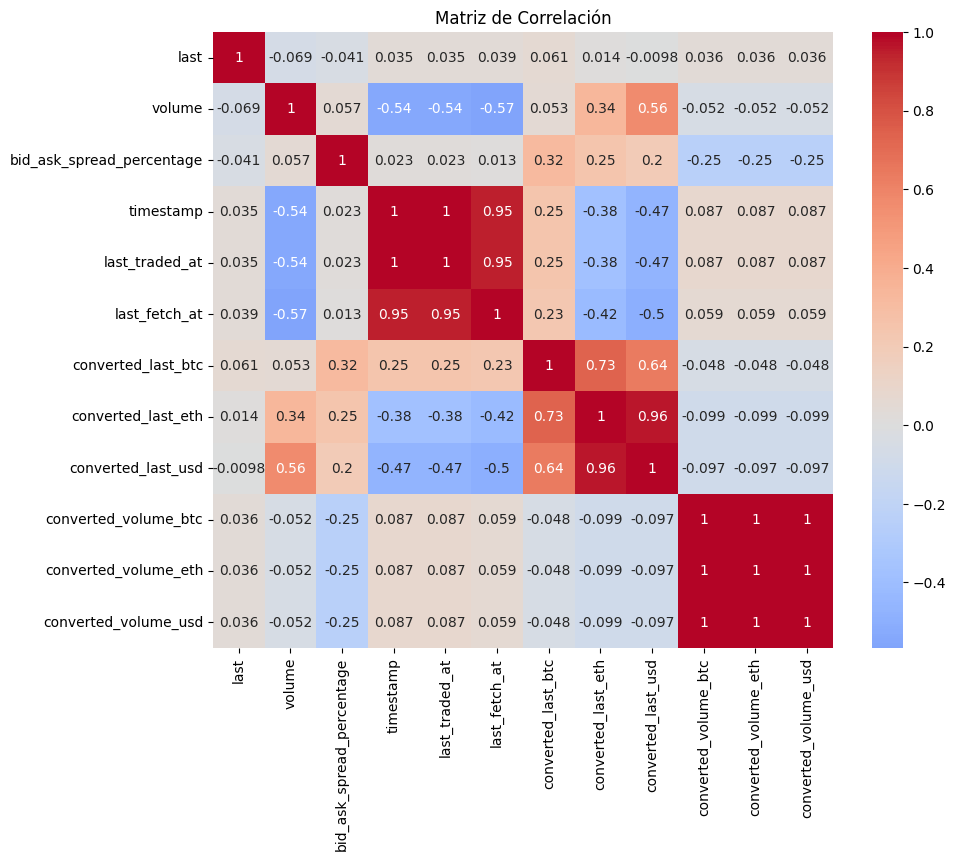

In [46]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

In [47]:
# Aplicar lowercase a todo el DataFrame
ticker_df = ticker_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [48]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [49]:
ticker_df.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,btc,usd,28918.12,8031.114469,green,0.015636,1692219182000,1692219182000,1692219182000,False,False,https://pro.coinbase.com/trade/btc-usd,not founded token_info_url #404,bitcoin,usd,coinbase exchange,gdax,0.999751,16.018087,28918,8029.0,128643.0,232244732
1,btc,usd,28913.90,1445.802666,green,0.010346,1692219121000,1692219121000,1692219181000,False,False,https://pro.kraken.com/app/trade/btc-usd,not founded token_info_url #404,bitcoin,usd,kraken,kraken,0.999605,16.015750,28914,1445.0,23156.0,41803794
2,btc,usdt,28950.01,8889.181360,green,0.010035,1692219081000,1692219081000,1692219081000,False,False,https://www.xt.com/en/trade/btc_usdt,not founded token_info_url #404,bitcoin,tether,xt.com,xt,0.999729,16.016792,28914,8943.0,143273.0,258638446
3,btc,usdt,28945.20,2888.613212,green,0.058631,1692219107000,1692219107000,1692219107000,False,False,not founded trade_url #404,not founded token_info_url #404,bitcoin,tether,tidex,tidex,0.999563,16.014131,28909,2887.0,46259.0,83506788
4,btc,usdc,28939.00,2061.983000,green,0.013456,1692219169000,1692219169000,1692219169000,False,False,https://pro.apex.exchange/trade/btc-usdc,not founded token_info_url #404,bitcoin,usd-coin,apex pro,apex_pro,1.000123,16.023771,28927,2075.0,33244.0,60014513


### normalized ticker_df for ML then

In [50]:
# Seleccionar solo las columnas numéricas
numeric_columns = ticker_df.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [51]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,28918.12,8031.114469,0.015636,1692219182000,1692219182000,1692219182000,0.999751,16.018087,28918,8029.0,128643.0,232244732
1,28913.90,1445.802666,0.010346,1692219121000,1692219121000,1692219181000,0.999605,16.015750,28914,1445.0,23156.0,41803794
2,28950.01,8889.181360,0.010035,1692219081000,1692219081000,1692219081000,0.999729,16.016792,28914,8943.0,143273.0,258638446
3,28945.20,2888.613212,0.058631,1692219107000,1692219107000,1692219107000,0.999563,16.014131,28909,2887.0,46259.0,83506788
4,28939.00,2061.983000,0.013456,1692219169000,1692219169000,1692219169000,1.000123,16.023771,28927,2075.0,33244.0,60014513


In [52]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [53]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0.058298,0.000250,0.013497,0.968348,0.968348,0.968348,0.502265,0.275026,0.242991,0.430098,0.430126,0.430156
1,0.058289,0.000045,0.000822,0.908012,0.908012,0.967359,0.466975,0.227146,0.205607,0.077312,0.077330,0.077334
2,0.058362,0.000277,0.000077,0.868447,0.868447,0.868447,0.496946,0.248494,0.205607,0.479073,0.479055,0.479055
3,0.058353,0.000090,0.116517,0.894164,0.894164,0.894164,0.456769,0.193977,0.158879,0.154578,0.154597,0.154595
4,0.058340,0.000064,0.008274,0.955490,0.955490,0.955490,0.592185,0.391477,0.327103,0.111069,0.111069,0.111072


In [54]:
# Calcular la matriz de correlación
correlation_matrix = normalized_df.corr()


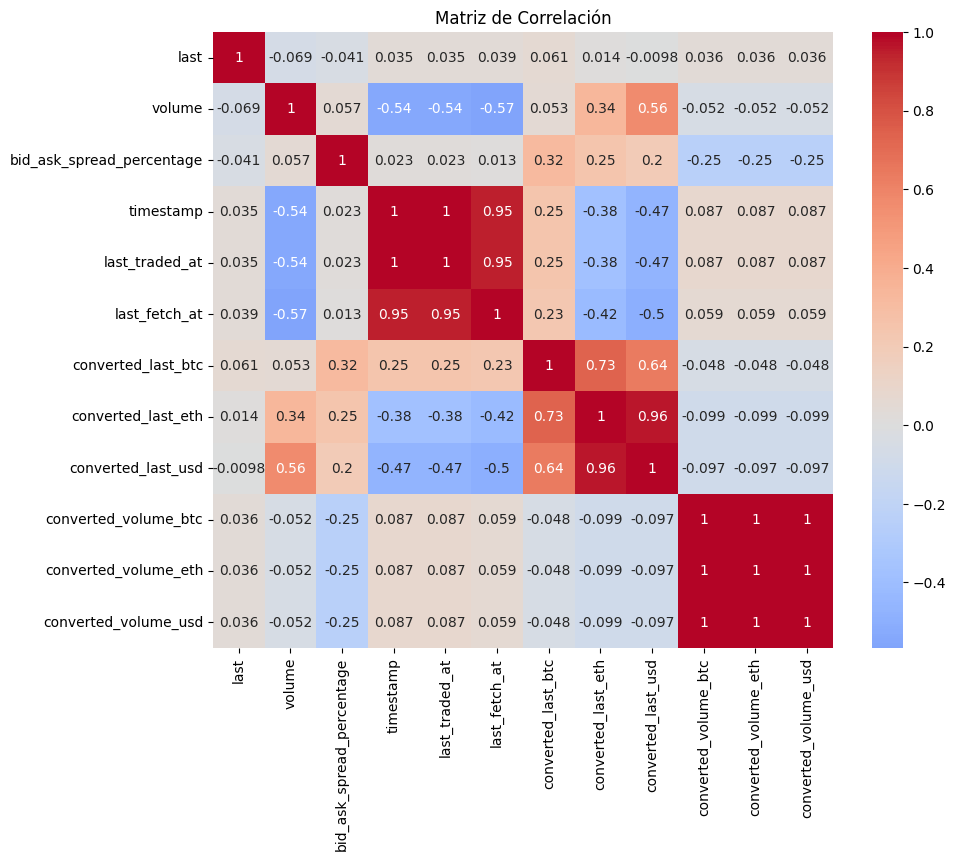

In [55]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

### Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

In [56]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)


In [57]:
list_of_global_data

,data
active_cryptocurrencies,10064
ended_icos,3376
market_cap_change_percentage_24h_usd,-1.340967
market_cap_percentage,"{'btc': 47.46720828130035, 'eth': 18.260022785931444, 'usdt': 6.995938902587537, 'bnb': 3.0148797671960015, 'xrp': 2.6078895176215937, 'usdc': 2.189028501309863, 'steth': 1.2370354256005793, 'doge': 0.8023204911239057, 'ada': 0.8026162627970944, 'sol': 0.7830791283215643}"
markets,813
ongoing_icos,49
total_market_cap,"{'btc': 40999378.75422878, 'eth': 656831805.7899231, 'ltc': 15872876380.728065, 'bch': 5722074743.408164, 'bnb': 5103585567.812588, 'eos': 1865070130170.102, 'xrp': 2022603502844.7537, 'xlm': 9401364242081.072, 'link': 176399088906.65475, 'dot': 255784191448.91586, 'yfi': 208013182.0398904, 'usd': 1185077643561.3015, 'aed': 4352867214847.491, 'ars': 414746837258779.6, 'aud': 1845421867795.9539, 'bdt': 129730828865501.31, 'bhd': 446643913081.81854, 'bmd': 1185077643561.3015, 'brl': 5910574747262.004, 'cad': 1603897118649.9426, 'chf': 1042855290479.8632, 'clp': 1031313819309223.5, 'cny': 8648933658239.083, 'czk': 26250891898055.086, 'dkk': 8116505529772.79, 'eur': 1089334035660.3401, 'gbp': 931134465788.4108, 'hkd': 9280638111061.787, 'huf': 421334950521808.6, 'idr': 1.8212906311318316e+16, 'ils': 4445960989137.461, 'inr': 98733728261768.98, 'jpy': 173410584583674.22, 'krw': 1591792209424132.8, 'kwd': 364744382212.9406, 'lkr': 380491166581031.6, 'mmk': 2489154158319921.0, 'mxn': 20308882966297.617, 'myr': 5486316950867.043, 'ngn': 916373138660212.2, 'nok': 12580836407463.064, 'nzd': 1996399574508.0198, 'php': 67180859425380.77, 'pkr': 347998050031775.8, 'pln': 4868595229160.705, 'rub': 111989847982241.75, 'sar': 4444655033574.238, 'sek': 12946873709385.137, 'sgd': 1611652266749.4097, 'thb': 42082107122861.61, 'try': 32094868836981.84, 'twd': 37881601785414.03, 'uah': 43778334825799.15, 'vef': 118661824449.7929, 'vnd': 2.838260956329313e+16, 'zar': 22728587534775.15, 'xdr': 888695650294.8352, 'xag': 52839210953.56141, 'xau': 626005414.4348212, 'bits': 40999378754228.78, 'sats': 4099937875422878.0}"
total_volume,"{'btc': 1388029.7405340886, 'eth': 22236973.063185465, 'ltc': 537374593.3162268, 'bch': 193720250.47063172, 'bnb': 172781363.19940633, 'eos': 63141756961.15574, 'xrp': 68475033050.77217, 'xlm': 318282217099.60187, 'link': 5971972967.524526, 'dot': 8659547429.18979, 'yfi': 7042264.831018179, 'usd': 40120681436.800575, 'aed': 147365870761.6619, 'ars': 14041211413435.395, 'aud': 62476567064.28878, 'bdt': 4392023835504.609, 'bhd': 15121083626.715755, 'bmd': 40120681436.800575, 'brl': 200101898666.0433, 'cad': 54299771584.06163, 'chf': 35305758336.888596, 'clp': 34915023020375.727, 'cny': 292808757262.0577, 'czk': 888721238642.8563, 'dkk': 274783457868.17618, 'eur': 36879291462.84001, 'gbp': 31523461335.797173, 'hkd': 314195046381.2627, 'huf': 14264251308695.957, 'idr': 616596065350462.9, 'ils': 150517550891.93018, 'inr': 3342620190483.0376, 'jpy': 5870797461796.067, 'krw': 53889961130283.56, 'kwd': 12348383453.299908, 'lkr': 12881489214528.867, 'mmk': 84270057388754.66, 'mxn': 687555138901.7019, 'myr': 185738694711.66815, 'ngn': 31023718127820.42, 'nok': 425922919443.0571, 'nzd': 67587901758.65573, 'php': 2274401069246.6997, 'pkr': 11781438103916.477, 'pln': 164825789512.73557, 'rub': 3791404756863.786, 'sar': 150473337900.98618, 'sek': 438315074559.8048, 'sgd': 54562321323.384125, 'thb': 1424685397820.7812, 'try': 1086568475374.1946, 'twd': 1282477722709.4104, 'uah': 1482111011816.2688, 'vef': 4017283832.2668343, 'vnd': 960890320411372.4, 'zar': 769473987586.8567, 'xdr': 30086699612.86385, 'xag': 1788866038.9112139, 'xau': 21193348.76217551, 'bits': 1388029740534.0886, 'sats': 138802974053408.86}"
upcoming_icos,0
updated_at,1692219021


In [58]:
list_of_global_data.head(15)

,data
active_cryptocurrencies,10064
ended_icos,3376
market_cap_change_percentage_24h_usd,-1.340967
market_cap_percentage,"{'btc': 47.46720828130035, 'eth': 18.260022785931444, 'usdt': 6.995938902587537, 'bnb': 3.0148797671960015, 'xrp': 2.6078895176215937, 'usdc': 2.189028501309863, 'steth': 1.2370354256005793, 'doge': 0.8023204911239057, 'ada': 0.8026162627970944, 'sol': 0.7830791283215643}"
markets,813
ongoing_icos,49
total_market_cap,"{'btc': 40999378.75422878, 'eth': 656831805.7899231, 'ltc': 15872876380.728065, 'bch': 5722074743.408164, 'bnb': 5103585567.812588, 'eos': 1865070130170.102, 'xrp': 2022603502844.7537, 'xlm': 9401364242081.072, 'link': 176399088906.65475, 'dot': 255784191448.91586, 'yfi': 208013182.0398904, 'usd': 1185077643561.3015, 'aed': 4352867214847.491, 'ars': 414746837258779.6, 'aud': 1845421867795.9539, 'bdt': 129730828865501.31, 'bhd': 446643913081.81854, 'bmd': 1185077643561.3015, 'brl': 5910574747262.004, 'cad': 1603897118649.9426, 'chf': 1042855290479.8632, 'clp': 1031313819309223.5, 'cny': 8648933658239.083, 'czk': 26250891898055.086, 'dkk': 8116505529772.79, 'eur': 1089334035660.3401, 'gbp': 931134465788.4108, 'hkd': 9280638111061.787, 'huf': 421334950521808.6, 'idr': 1.8212906311318316e+16, 'ils': 4445960989137.461, 'inr': 98733728261768.98, 'jpy': 173410584583674.22, 'krw': 1591792209424132.8, 'kwd': 364744382212.9406, 'lkr': 380491166581031.6, 'mmk': 2489154158319921.0, 'mxn': 20308882966297.617, 'myr': 5486316950867.043, 'ngn': 916373138660212.2, 'nok': 12580836407463.064, 'nzd': 1996399574508.0198, 'php': 67180859425380.77, 'pkr': 347998050031775.8, 'pln': 4868595229160.705, 'rub': 111989847982241.75, 'sar': 4444655033574.238, 'sek': 12946873709385.137, 'sgd': 1611652266749.4097, 'thb': 42082107122861.61, 'try': 32094868836981.84, 'twd': 37881601785414.03, 'uah': 43778334825799.15, 'vef': 118661824449.7929, 'vnd': 2.838260956329313e+16, 'zar': 22728587534775.15, 'xdr': 888695650294.8352, 'xag': 52839210953.56141, 'xau': 626005414.4348212, 'bits': 40999378754228.78, 'sats': 4099937875422878.0}"
total_volume,"{'btc': 1388029.7405340886, 'eth': 22236973.063185465, 'ltc': 537374593.3162268, 'bch': 193720250.47063172, 'bnb': 172781363.19940633, 'eos': 63141756961.15574, 'xrp': 68475033050.77217, 'xlm': 318282217099.60187, 'link': 5971972967.524526, 'dot': 8659547429.18979, 'yfi': 7042264.831018179, 'usd': 40120681436.800575, 'aed': 147365870761.6619, 'ars': 14041211413435.395, 'aud': 62476567064.28878, 'bdt': 4392023835504.609, 'bhd': 15121083626.715755, 'bmd': 40120681436.800575, 'brl': 200101898666.0433, 'cad': 54299771584.06163, 'chf': 35305758336.888596, 'clp': 34915023020375.727, 'cny': 292808757262.0577, 'czk': 888721238642.8563, 'dkk': 274783457868.17618, 'eur': 36879291462.84001, 'gbp': 31523461335.797173, 'hkd': 314195046381.2627, 'huf': 14264251308695.957, 'idr': 616596065350462.9, 'ils': 150517550891.93018, 'inr': 3342620190483.0376, 'jpy': 5870797461796.067, 'krw': 53889961130283.56, 'kwd': 12348383453.299908, 'lkr': 12881489214528.867, 'mmk': 84270057388754.66, 'mxn': 687555138901.7019, 'myr': 185738694711.66815, 'ngn': 31023718127820.42, 'nok': 425922919443.0571, 'nzd': 67587901758.65573, 'php': 2274401069246.6997, 'pkr': 11781438103916.477, 'pln': 164825789512.73557, 'rub': 3791404756863.786, 'sar': 150473337900.98618, 'sek': 438315074559.8048, 'sgd': 54562321323.384125, 'thb': 1424685397820.7812, 'try': 1086568475374.1946, 'twd': 1282477722709.4104, 'uah': 1482111011816.2688, 'vef': 4017283832.2668343, 'vnd': 960890320411372.4, 'zar': 769473987586.8567, 'xdr': 30086699612.86385, 'xag': 1788866038.9112139, 'xau': 21193348.76217551, 'bits': 1388029740534.0886, 'sats': 138802974053408.86}"
upcoming_icos,0
updated_at,1692219021


### Global Eecentralized Finance(defi) data:
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [59]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                                     data
defi_dominance            3.7404951167086601068464981706268519998012206752360867236873473
defi_market_cap                                           44389211829.6921265282406939284
defi_to_eth_ratio        20.4655335247190830998992337975066944846606141984973752052148925
eth_market_cap                                           216897408396.7910042760923243453
top_coin_defi_dominance                                                         33.113193
top_coin_name                                                           Lido Staked Ether
trading_volume_24h                                       1958649856.904305193241420272087


### Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [60]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
                   id  coin_id          name  symbol  market_cap_rank  \
0  trust-wallet-token    11085  Trust Wallet     TWT               99   
1             apecoin    24383       ApeCoin     APE               62   
2       matic-network     4713       Polygon   MATIC               13   
3         sei-network    28205           Sei     SEI              106   
4              unibot    30462        Unibot  UNIBOT              169   
5        cyberconnect    31274  CyberConnect   CYBER              419   
6                 gmx    18323           GMX     GMX              101   
7       worldcoin-wld    31069     Worldcoin     WLD              162   

                                                                                     thumb  \
0               https://assets.coingecko.com/coins/images/11085/thumb/Trust.png?1588062702   
1             https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455   
2     https://assets.coingecko.com/coins/im

### En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..